# Проект: Интернет-магазин "Стримчик"

Есть  интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные представленны до 2016 года. 


План:
 - Загрузить данные;
 - Провести обработку данных: обработать пропущенные значения, проверить дубликаты, преобразовать типы данных, посчитать суммарные продажи, а также обработать не стандартное значение 'tbd';
 - Провести исследовательский анализ и выявить некоторые закономерности;
 - Описать пользователя каждого региона;
 - Проверить заданные гипотезы.

#### Загрузка данных

In [1]:
#Объявление библиотек
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

In [3]:
#Вывод общей информации
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Вывод первых строк
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class='alert alert-info'>
    На данном этапе для загрузки данных был применена структура 'try-except' для исключения возникновения ошибки при запуске программы на разных устройствах. Датасет содержит 16715 строк, в некоторых столбцах заметно очень много пропусков. При выводе первых 5 строк можно увидеть как структурированы данные и какие обозначения присутствуют для каждого столбца.
</div>

#### Предобработка данных

##### Замена названий столбцов

In [5]:
data.columns = data.columns.str.lower()

##### Обработка пропусков

In [6]:
start_shape = data.shape[0]

In [7]:
data.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

In [8]:
data = data.dropna(subset = ['name', 'year_of_release'])

In [9]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

**В столбцах с названием игры и годом выпуска было мало пропусков, поэтому их можно удалить.**

In [10]:
data['critic_score'] = data.groupby(['platform', 'genre'])['critic_score'].transform(lambda x: x.fillna(x.mean()))

**Оценка критиков вполне может быть связана с платформой и жанром игры, поэтому можно сгруппировать по этим столбцам и заполнить средним**

In [11]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1111
user_score         6605
rating             6676
dtype: int64

In [12]:
data['rating'] = data['rating'].fillna('unknown')

**Данный столбец содержит категорию игры, заполним неопределенным названием категории**

In [13]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1111
user_score         6605
rating                0
dtype: int64

###### Обработка столбца user_score

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Видим значение 'tbd', что означает, что рейтинг ещё не определён, поэтому заменим это значение на nan и обработаем как и столбец
critic_score.**

In [15]:
data['user_score'].replace('tbd', np.nan, inplace=True)

In [16]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [17]:
data['user_score'] = data['user_score'].astype('float64')
data['user_score'] = data.groupby(['platform', 'genre'])['user_score'].transform(lambda x: x.fillna(x.mean()))

In [18]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1111
user_score         1104
rating                0
dtype: int64

In [19]:
finish_shape = data.shape[0]
finish_shape

16444

In [20]:
((start_shape - finish_shape) / start_shape) * 100

1.6212982351181575

**По итогам обработки пропусков можно сказать, что неопределенные значения были обнаружены в 6 столбцах, в трех из них пропуски были удалены, так как количество строк с пропусщенными значениями позволяло это сделать, в столбце с рейтингом критиков, заполнение происходило по средним значениям группировки по столбцам platform и genre, в столбце с рейтингом пользователей также, но прежде необходимо было обработать значение 'tbd', в столбце rating, заполнили 'unknown'. Пропуски могли появится из-за технических проблем, либо рейтинг игр не был сформирован или проставлен теми, кто их оценивал. По итогу удалено 1.6 % строк, что является допустимым.**

##### Проверка на дубликаты

In [21]:
data.duplicated().sum()

0

##### Преобразование типов столбцов

In [22]:
data['year_of_release'] = data['year_of_release'].astype('int32')

**Столбец с годом выхода игры следует преобразовать в целочисленный тип, а также столбец user_score уже был преобразован в float тип.**

##### Суммарные продажи

In [23]:
data['total_sales'] = data[['eu_sales', 'na_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


<div class='alert alert-info'>
  По итогам обработки данных, ко всем изменениям, которые описаны выше, после удаления пропусков, была сделана проверка на наличие дубликатов, обнаружено их не было. Преобразован ещё один тип столбца year_of_release из float в int. Добавлен столбец с суммарной продажей по всем регионам для каждый игры.
</div>

#### Исследовательский анализ

##### Зависимость количества выпущенных игр от года выпуска

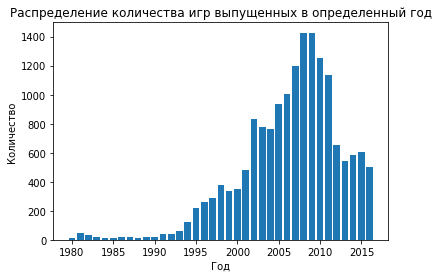

,year_of_release,count
0,1980,9
4,1984,14
5,1985,14
8,1988,15
10,1990,16
7,1987,16
9,1989,17
3,1983,17
6,1986,21
2,1982,36


In [25]:
pivot_year = (data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index().
              rename(columns = {'name':'count'}))
plt.bar(pivot_year['year_of_release'], pivot_year['count'])
plt.title('Распределение количества игр выпущенных в определенный год')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()
pivot_year.sort_values(by='count').head(10)

**Из полученного распределения можно сказать, что в основном игры стали выпускаться после 1990 года, до этого было очень мало, поэтому датафрейм можно сократить и убрать период до 1990 года**

In [26]:
data = data.query('year_of_release >= 1990')

##### Анализ продаж в зависимости от платформы

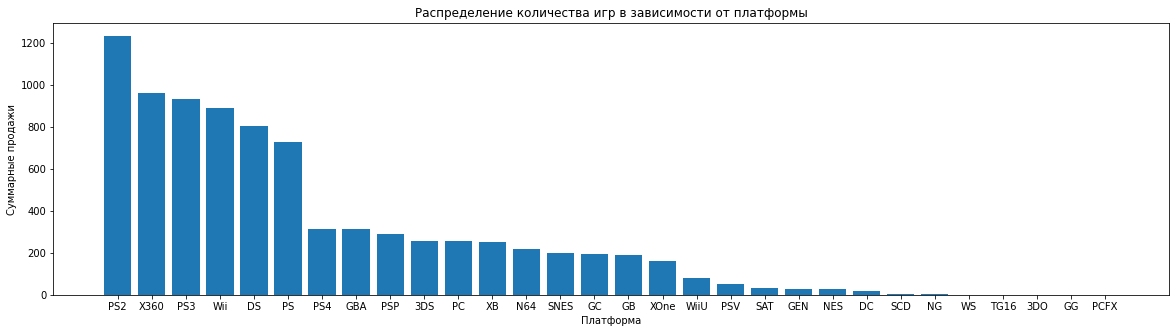

,platform,total_sales
15,PS2,1233.56
27,X360,961.24
16,PS3,931.34
25,Wii,891.18
3,DS,802.76
14,PS,727.58
17,PS4,314.14
5,GBA,312.88
18,PSP,289.53
1,3DS,257.81


In [27]:
pivot_platform = (data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index().
              sort_values(by = 'total_sales', ascending = False))
plt.figure(figsize=(20, 5))
plt.bar(pivot_platform['platform'], pivot_platform['total_sales'])
plt.title('Распределение количества игр в зависимости от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()
pivot_platform.head(10)

**Выберем первые 10 платформ с наибольшими продажами.**

In [28]:
data_top_platform = data.query('platform in @ pivot_platform["platform"].head(10).unique()')
data_top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


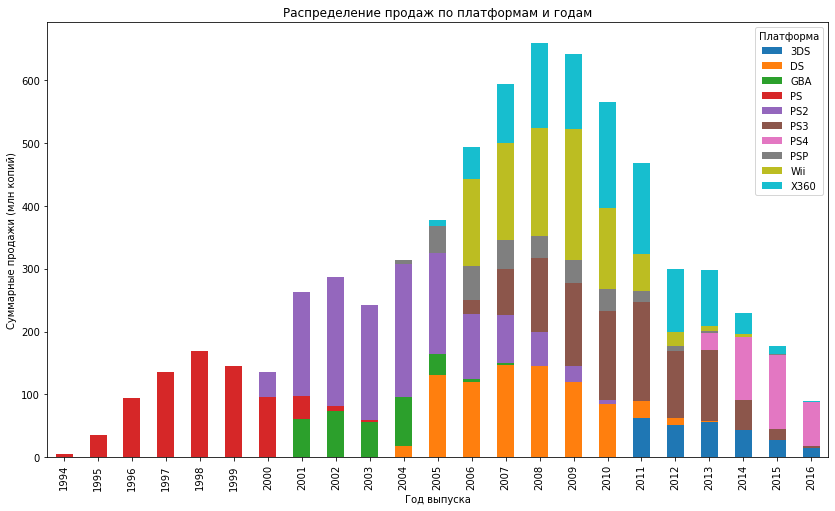

In [29]:
platform_year_sales = data_top_platform.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
platform_year_sales.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Распределение продаж по платформам и годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформа')
plt.show()

In [30]:
platform_lifetimes = data_top_platform.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetimes['lifetime'] = platform_lifetimes['max'] - platform_lifetimes['min']

# Вывод временного диапазона существования платформ
platform_lifetimes.reset_index()

,platform,min,max,lifetime
0,3DS,2011,2016,5
1,DS,2004,2013,9
2,GBA,2000,2007,7
3,PS,1994,2003,9
4,PS2,2000,2011,11
5,PS3,2006,2016,10
6,PS4,2013,2016,3
7,PSP,2004,2015,11
8,Wii,2006,2016,10
9,X360,2005,2016,11


**По выше приведенной таблице, можно оценить в какие годы и в какой срок платформа была актуальной, срок колеблется от 3 до 11 лет.**

##### Определение платформ лидирующих по продажам, растут или падают

<div class='alert alert-info'>
Рассмотрим актуальный период последние 3 года доступные в датасете.(2014, 2015, 2016)
</div>

In [31]:
data_sales = data.query('year_of_release >= 2014')
np.sort(data_sales['year_of_release'].unique())

array([2014, 2015, 2016], dtype=int32)

In [32]:
platform_sales = data_sales.groupby('platform')['total_sales'].sum()

# Выбор платформ с наибольшими суммарными продажами 
top_platforms = platform_sales.nlargest(10).index.tolist()
print("Лучшие платформы по общему объему продаж:")
print(top_platforms)

Лучшие платформы по общему объему продаж:
['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']


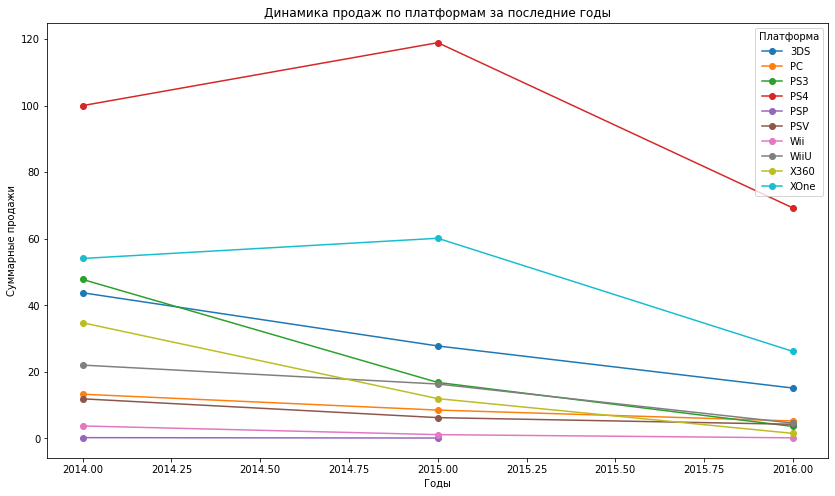

In [33]:
top_platforms_data = data_sales[data_sales['platform'].isin(top_platforms)]
# Группировка по платформам и годам, суммирование продаж
platform_year_sales = top_platforms_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack().T
platform_year_sales.plot(figsize=(14, 8), marker='o')
plt.title('Динамика продаж по платформам за последние годы')
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.show()

In [34]:
# Вычисление среднегодового изменения продаж для каждой платформы
yearly_changes = platform_year_sales.diff().mean()

# Определение роста или падения
growth_platforms = yearly_changes[yearly_changes > 0].index.tolist()
decline_platforms = yearly_changes[yearly_changes < 0].index.tolist()

print('Платформы, демонстрирующие рост:')
print(growth_platforms)

print("Платформы демонстрируют спад:")
decline_platforms

Платформы, демонстрирующие рост:
[]
Платформы демонстрируют спад:


['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

<div class='alert alert-info'>
По результатам анализа получили, что к 2016 году все рассматриваемые платформы демонстируют спад своих продаж. 
</div>

##### Ящик с усами с глобальными продажами игр

In [35]:
data_top_platform_five = data.query('platform in @ pivot_platform["platform"].head(5).unique()')

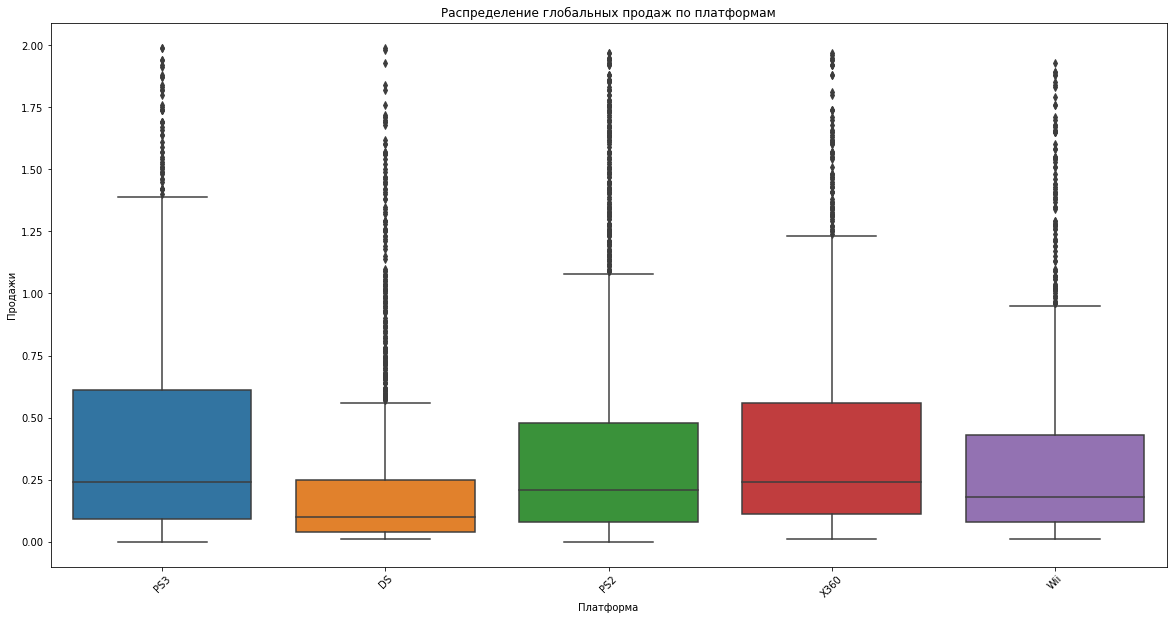

In [36]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='platform', y='total_sales', data=data_top_platform_five.query('total_sales < 2'))
plt.title('Распределение глобальных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.show()

<div class='alert alert-info'>
 Из построенной диаграммы с ящиками для топ 5 перспективных платформ, можно сделать вывод, что очень много выбросов(очень больших значений продаж) имеют данные о этих платформах. Самое высокое значение продаж (1.4 млн), не являющееся выбросами имеют данные о платформе PS3, меньше всего у DS(около 0.6 млн), средние значения примерно на одинаковом уровне.
</div>

##### Рассмотрим одну популярную платформу

###### Оценки критиков

In [37]:
# Выведем таблицу, с топ 10 платформами про продажам
data_top_platform = data_top_platform.reset_index()
data_top_platform

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,29.80
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12164,16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,67.807692,7.686000,unknown,0.01
12165,16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,66.844720,7.539437,unknown,0.00
12166,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69.012766,6.901550,unknown,0.01
12167,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,69.758170,6.291463,unknown,0.01


In [38]:
data_top_platform['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'PS',
       'PSP'], dtype=object)

<div class='alert alert-info'>
Для исследования возьмём PS4 и X360.
</div>

In [39]:
data_ps4 = data.query('platform == "PS4"')
data_x360 = data.query('platform == "X360"')

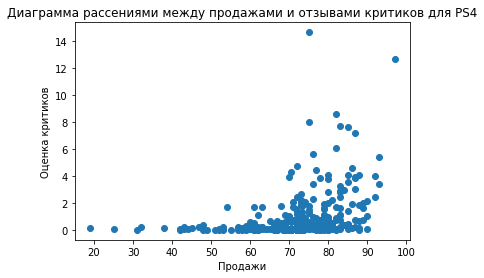

In [40]:
# Диаграмма рассениями между продажами и отзывами критиков
plt.scatter(data_ps4['critic_score'], data_ps4['total_sales'])
plt.title('Диаграмма рассениями между продажами и отзывами критиков для PS4')
plt.xlabel('Продажи')
plt.ylabel('Оценка критиков')
plt.show()

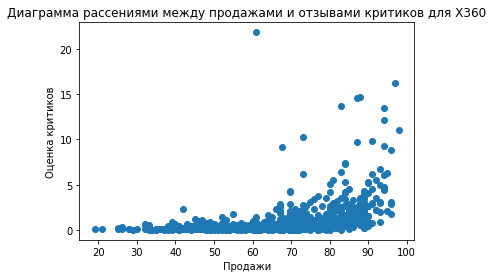

In [41]:
plt.scatter(data_x360['critic_score'], data_x360['total_sales'])
plt.title('Диаграмма рассениями между продажами и отзывами критиков для X360')
plt.xlabel('Продажи')
plt.ylabel('Оценка критиков')
plt.show()

In [42]:
# Коэффициент корреляции
print('Коэффициент корреляции для PS4: ', round(data_ps4['critic_score'].corr(data_ps4['total_sales']), 5))
print('Коэффициент корреляции для X360: ', round(data_x360['critic_score'].corr(data_x360['total_sales']), 5))

Коэффициент корреляции для PS4:  0.33949
Коэффициент корреляции для X360:  0.38002


<div class='alert alert-info'>
Получили коэффициент корреляции 0.34 для PS4 и 0.38 для X360, значения достаточно близки для того, чтобы сделать один и тот же вывод для обоих платформ, что говорит о достаточно слабой линейной свзяи между продажами и оценкой критиков.
</div>

###### Оценки пользователей

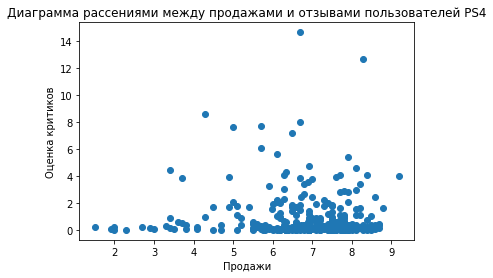

In [43]:
# Диаграмма рассениями между продажами и отзывами пользователей
plt.scatter(data_ps4['user_score'], data_ps4['total_sales'])
plt.title('Диаграмма рассениями между продажами и отзывами пользователей PS4')
plt.xlabel('Продажи')
plt.ylabel('Оценка критиков')
plt.show()

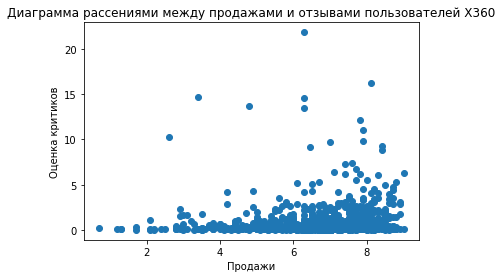

In [44]:
# Диаграмма рассениями между продажами и отзывами пользователей
plt.scatter(data_x360['user_score'], data_x360['total_sales'])
plt.title('Диаграмма рассениями между продажами и отзывами пользователей X360')
plt.xlabel('Продажи')
plt.ylabel('Оценка критиков')
plt.show()

In [45]:
# Коэффициент корреляции
print('Коэффициент корреляции для PS4: ', round(data_ps4['user_score'].corr(data_ps4['total_sales']), 5))
print('Коэффициент корреляции для X360: ', round(data_x360['user_score'].corr(data_x360['total_sales']), 5))

Коэффициент корреляции для PS4:  -0.05366
Коэффициент корреляции для X360:  0.11512


<div class='alert alert-info'>
Коэффициент корреляции в -0.054 для PS4  и 0.115 для X360 говорит о том, что между продажами и отзывами пользователей практически нету линейной зависимости.
</div>

##### Распределение игр по жанрам

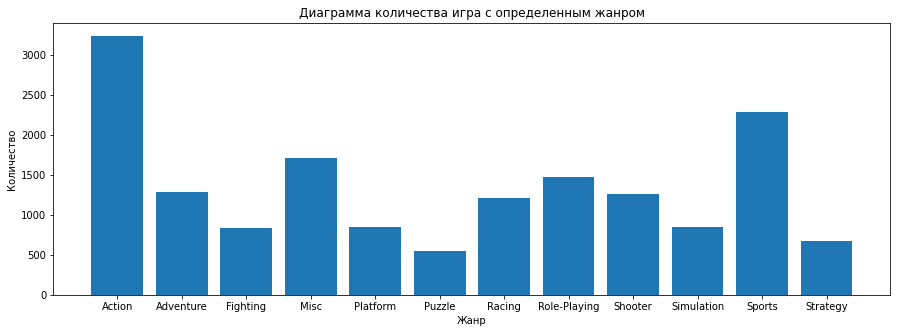

In [46]:
plt.figure(figsize=(15,5))
plt.bar(data.groupby('genre')['genre'].count().index, data.groupby('genre')['genre'].count())
plt.title('Диаграмма количества игра с определенным жанром')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()

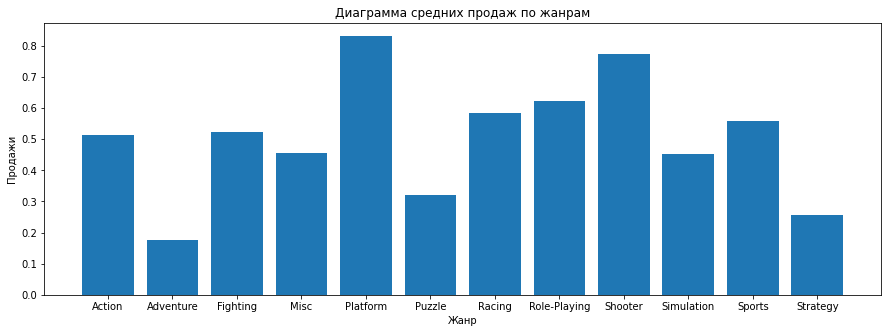

In [47]:
plt.figure(figsize=(15,5))
pivot_genre = data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').reset_index()
plt.bar(pivot_genre['genre'], pivot_genre['total_sales'])
plt.title('Диаграмма средних продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

<div class='alert alert-info'>
    По результатам построений диаграмм, можно сказать, что самый часто продаваемые жанр Action и Sports, а самый низко продаваемые Puzzle и Strategy. Относительно продаж, рассмотрен вариант средних продаж. Из полученной диаграммы видим, что самые высокие продажи имеют жанры игр: Platform, Shooter и Role-Playing, а самые низкие: Adventure, Puzzle и Strategy.
</div>

#### Портрет  пользователя региона

##### Пользователи Северной Америки

In [48]:
pivot_na_platform = data.pivot_table(index='platform', values='na_sales', aggfunc = 'sum')
sum_sales = pivot_na_platform['na_sales'].sum()
pivot_na_platform['shares'] = pivot_na_platform['na_sales'] / sum_sales
pivot_na_platform.reset_index().sort_values(by='na_sales', ascending=False).head()

,platform,na_sales,shares
27,X360,595.74,0.145099
15,PS2,572.92,0.139541
25,Wii,486.87,0.118582
16,PS3,390.13,0.095020
3,DS,380.31,0.092628


In [49]:
pivot_na_genre = data.pivot_table(index='genre', values='na_sales', aggfunc = 'sum')
pivot_na_genre.reset_index().sort_values(by='na_sales', ascending=False).head()

,genre,na_sales
0,Action,825.27
10,Sports,660.05
8,Shooter,533.99
3,Misc,396.22
4,Platform,370.10


In [50]:
pivot_na_rating = data.pivot_table(index='rating', values='na_sales', aggfunc = 'sum').reset_index().sort_values(by='na_sales')
pivot_na_rating.reset_index()

,index,rating,na_sales
0,6,RP,0.00
1,0,AO,1.26
2,3,EC,1.53
3,4,K-A,2.56
4,2,E10+,345.50
5,5,M,742.89
6,7,T,747.60
7,8,unknown,990.18
8,1,E,1274.24


Вывод: по итогам группировок исходного датасета по исследуемым столбцам, можно выделить следующее: 

1) В Северной Америке топ 5 платформ для игр являются: X360, PS2, Wii, PS3, DS. Доля их вовлеченности в продаваемостьсоставляет от 14,5 до 9.2%.

2) Преобладающими жанрами являются: Action, Sport, Shooter, Misc, Platform. 

3) Из категорий больше всего преобладают E, unknown(та которая была задана самостоятельно), T, M, E+10, вовлеченность остальных категорий очень мала.

##### Пользователи Европы

In [51]:
pivot_eu_platform = data.pivot_table(index='platform', values='eu_sales', aggfunc = 'sum')
sum_sales = pivot_eu_platform['eu_sales'].sum()
pivot_eu_platform['shares'] = pivot_eu_platform['eu_sales'] / sum_sales
pivot_eu_platform.reset_index().sort_values(by='eu_sales', ascending=False).head()

,platform,eu_sales,shares
15,PS2,332.63,0.140440
16,PS3,327.21,0.138152
27,X360,268.32,0.113288
25,Wii,258.32,0.109066
14,PS,212.39,0.089674


In [52]:
pivot_eu_genre = data.pivot_table(index='genre', values='eu_sales', aggfunc = 'sum')
pivot_eu_genre.reset_index().sort_values(by='eu_sales', ascending=False).head()

,genre,eu_sales
0,Action,506.70
10,Sports,368.76
8,Shooter,311.69
6,Racing,233.13
3,Misc,210.40


In [53]:
pivot_eu_rating = data.pivot_table(index='rating', values='eu_sales', aggfunc = 'sum').reset_index().sort_values(by='eu_sales')
pivot_eu_rating.reset_index()

,index,rating,eu_sales
0,6,RP,0.03
1,3,EC,0.11
2,4,K-A,0.27
3,0,AO,0.61
4,2,E10+,183.33
5,7,T,421.76
6,5,M,480.00
7,8,unknown,578.50
8,1,E,703.87


Вывод: по итогам группировок исходного датасета по исследуемым столбцам, можно выделить следующее: 

1) В Европе топ 5 платформ для игр являются: X360, PS2, Wii, PS3, PS(Одно отличение от Северой Америки). Доля их вовлеченности в продаваемостьсоставляет от 14 до 9%.

2) Преобладающими жанрами являются: Action, Sport, Shooter, Misc, Racing(одно отличие от Северной Америки). 

3) Из категорий больше всего преобладают E, unknown(та которая была задана самостоятельно), T, M, E+10, вовлеченность остальных категорий очень мала.

##### Пользователи Японии

In [54]:
pivot_jp_platform = data.pivot_table(index='platform', values='jp_sales', aggfunc = 'sum')
sum_sales = pivot_jp_platform['jp_sales'].sum()
pivot_jp_platform['shares'] = pivot_jp_platform['jp_sales'] / sum_sales
pivot_jp_platform.reset_index().sort_values(by='jp_sales', ascending=False).head()

,platform,jp_sales,shares
3,DS,175.00,0.147288
14,PS,139.78,0.117645
15,PS2,137.54,0.115760
22,SNES,116.55,0.098094
1,3DS,100.62,0.084686


In [55]:
pivot_jp_genre = data.pivot_table(index='genre', values='jp_sales', aggfunc = 'sum')
pivot_jp_genre.reset_index().sort_values(by='jp_sales', ascending=False).head()

,genre,jp_sales
7,Role-Playing,340.71
0,Action,151.83
10,Sports,116.73
3,Misc,102.16
4,Platform,98.26


In [56]:
pivot_jp_rating = data.pivot_table(index='rating', values='jp_sales', aggfunc = 'sum').reset_index().sort_values(by='jp_sales')
pivot_jp_rating.reset_index()

,index,rating,jp_sales
0,0,AO,0.00
1,3,EC,0.00
2,6,RP,0.00
3,4,K-A,1.46
4,2,E10+,40.20
5,5,M,63.58
6,7,T,150.70
7,1,E,197.96
8,8,unknown,734.25


Вывод: по итогам группировок исходного датасета по исследуемым столбцам, можно выделить следующее: 

1) В Яполнии топ 5 платформ для игр являются: PS, DS, PS2, SNES, 3DS. Доля их вовлеченности в продаваемостьсоставляет от 14,7 до 8.5%.

2) Преобладающими жанрами являются: Action, Sport, Role-Playing, Misc, Platform. 

3) Из категорий больше всего преобладают E, unknown(та которая была задана самостоятельно), T, а вот в  M, E+10, уже в меньшей степени, вовлеченность остальных категорий очень мала(у некоторых вообще нулевая).

#### Проверка гипотез

##### Средние пользовательские рейтинги платформ

Задаем гипотезы:


H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [57]:
xbox_one_scores = data[data['platform'] == 'XOne']['user_score'].dropna()
pc_scores = data[data['platform'] == 'PC']['user_score'].dropna()

In [58]:
# Проверка среднего значения для каждой группы
print(f"Средний пользовательский рейтинг Xbox One: {xbox_one_scores.mean()}")
print(f"Средний пользовательский рейтинг PC: {pc_scores.mean()}")

Средний пользовательский рейтинг Xbox One: 6.586171675792931
Средний пользовательский рейтинг PC: 7.095690342964553


In [59]:
# Выполнение t-теста для независимых выборок
t_stat, p_value = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Вывод результатов
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")


T-статистика: -5.720495382186805
P-значение: 2.012858690105811e-08


In [60]:
# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: Средние пользовательские рейтинги различаются.")
else:
    print("Не отклоняем нулевую гипотезу: Средние пользовательские рейтинги одинаковые.")

Отклоняем нулевую гипотезу: Средние пользовательские рейтинги различаются.


##### Средние пользовательские рейтинги жанров

Задаем гипотезы:

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [61]:
# Фильтрация данных для жанров Action и Sports
action_scores = data[data['genre'] == 'Action']['user_score'].dropna()
sports_scores = data[data['genre'] == 'Sports']['user_score'].dropna()

In [62]:
# Проверка среднего значения для каждой группы
print(f"Средний пользовательский рейтинг Action: {action_scores.mean()}")
print(f"Средний пользовательский рейтинг Sports: {sports_scores.mean()}")

Средний пользовательский рейтинг Action: 7.030255609434802
Средний пользовательский рейтинг Sports: 7.1183529036390985


In [63]:
# Выполнение t-теста для независимых выборок
t_stat, p_value = st.ttest_ind(action_scores, sports_scores, equal_var=False)
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

T-статистика: -2.6150705052170404
P-значение: 0.008953561922559574


In [64]:
# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: Средние пользовательские рейтинги различаются.")
else:
    print("Не отклоняем нулевую гипотезу: Средние пользовательские рейтинги одинаковые.")

Отклоняем нулевую гипотезу: Средние пользовательские рейтинги различаются.


In [65]:
((start_shape - data.shape[0]) / start_shape) * 100

2.8477415495064315

**Пользовательские рейтинги жанров Action и Sports, а также рейтинги платформ XONe и PC представляют  по две разных групп данных, которые не зависят друг от друга. Пользовательские рейтинги являются числовыми значениями, что подходит для использования t-теста. Предполагается, что данные распределены нормально, особенно при большом количестве наблюдений, что позволяет применять t-тест. Тест проверяет, есть ли статистически значимое различие между средними значениями двух групп. Параметр сравнения alpha выбирается либо 0.05, либо 0.01, был использован 0.05.**

#### Итоговый вывод:

В результате выполнения проекта было проведено исследование магазина "Стримчик". Были выполненны следующие действия:

* Проведена обработка данных: Заменили названия столбцов, а точнее названия были зависаны с учетом верхнего регистра, перевели в   нижний. Далее обработка пропусков показала, что неопределенные значения были обнаружены в 6 столбцах, в трех из них пропуски были удалены, так как количество строк с пропущенными значениями позволяло это сделать, в столбце с рейтингом критиков, заполнение происходило по средним значениям группировки по столбцам platform и genre, в столбце с рейтингом пользователей также, но прежде необходимо было обработать значение 'tbd', в столбце rating, заполнили 'unknown'. Пропуски могли появится из-за технических проблем, либо рейтинг игр не был сформирован или проставлен теми, кто их оценивал. По итогу с учетом дальнейших преобразований датасета удалено 2.85 % строк, что является допустимым. Дубликаты не обнаружены.
* В исследовательском анализе были получены следующие данные: 
 - в основном игры стали выпускаться после 1990 года, данные до этого года были проигнорированы, так как практически никакой информации не давали бы.
 - При оценке вовлеченности платформы можно сказать, что самыми популярными платформами являются PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. После этого оценили временной диапазон актуальности данных платформ в основном срок актуальности входит в интервал от 3 до 11 лет. Если брать относительно всего датасета то самой популярной является PS2, а самой менее популярной PCFX.
 - Далее выявили какие платформы демонстрируют рост по продажам, а какие спад. Получили, что все платформы демонстрируют спад в период с 2014 и до 2016 года.
 - Построение графика "ящик с усами" (box plot) для глобальных продаж игр по платформам показало значительные различия в продажах между различными платформами. Платформы с наибольшими суммарными продажами (например, PS2, Xbox 360) имели более высокие медианные значения и больший разброс в продажах, что указывает на их популярность и разнообразие в успешности игр. Выбросы на графиках указали на отдельные игры с чрезвычайно высокими продажами, что говорит о наличии хитов, значительно влияющих на общие показатели платформы.
 - Для того, чтобы отследить зависимость продаж платформ по оценкам критиков и пользователей была выбрана платформа PS4 и для сравнения X360, посчитан коэффициент корреляции для критиков, который составил 0.34 и 0.38, соответственно, что говорит о достаточно слабой линейной свзяи между продажами и оценкой критиков. Отсносительно пользователей получилось -0.054 и 0.115 , соответственно, говорит о том, что между продажами и отзывами пользователей практически нету линейной зависимости.
 - Проведено исследование по самым популярным жанрам.  По результатам построений диаграмм, можно сказать, что самый часто продаваемые жанр Action и Sports, а самый низко продаваемые Puzzle и Strategy. Относительно продаж, рассмотрен вариант средних продаж. Из полученной диаграммы видим, что самые высокие продажи имеют жанры игр: Platform, Shooter и Role-Playing, а самые низкие: Adventure, Puzzle и Strategy.
* Составлен портрет пользователя из заданного региона:
 - Севереная Америка: 
   - В Северной Америке топ 5 платформ для игр являются: X360, PS2, Wii, PS3, DS. Доля их вовлеченности в продаваемость составляет от 14,5 до 9.2%.
   - Преобладающими жанрами являются: Action, Sport, Shooter, Misc, Platform.
   - Из категорий больше всего преобладают E, unknown(та которая была задана самостоятельно), T, M, E+10, вовлеченность остальных категорий очень мала.
 - Европа:
   - В Европе топ 5 платформ для игр являются: X360, PS2, Wii, PS3, PS(Одно отличение от Северой Америки). Доля их вовлеченности в продаваемостьсоставляет от 14 до 9%.
   - Преобладающими жанрами являются: Action, Sport, Shooter, Misc, Racing(одно отличие от Северной Америки).
   - Из категорий больше всего преобладают E, unknown(та которая была задана самостоятельно), T, M, E+10, вовлеченность остальных категорий очень мала.
 - Япония: 
   - В Яполнии топ 5 платформ для игр являются: PS, DS, PS2, SNES, 3DS. Доля их вовлеченности в продаваемостьсоставляет от 14,7 до 8.5%.
   - Преобладающими жанрами являются: Action, Sport, Role-Playing, Misc, Platform.
   - Из категорий больше всего преобладают E, unknown(та которая была задана самостоятельно), T, а вот в M, E+10, уже в меньшей степени, вовлеченность остальных категорий очень мала(у некоторых вообще нулевая).
   
   По итогам можно отметить, что пользователи всех регионов имеют практически одинаковые предпочтения относительно жанров игр. Жители Европы и Северной Америки имеют почти одинаковые препочтения относительно платформ для игр.
* Проверка гипотез показала, что средние пользовательские рейтинги платформ Xbox One и PC различаются, как и средние пользовательские рейтинги жанров Action и Sports тоже будут различаться.




Проведенный анализ показал, что средние пользовательские рейтинги могут значительно различаться в зависимости от жанра игры, что необходимо учитывать при разработке и маркетинге игр. В то же время рейтинги платформ Xbox One и PC оказались схожими, что может свидетельствовать о схожих предпочтениях пользователей этих платформ. Визуализация глобальных продаж по платформам и анализ жизненного цикла платформ предоставили важные инсайты для стратегического планирования в игровой индустрии.

Эти результаты могут быть полезны разработчикам игр, маркетологам и аналитикам для принятия обоснованных решений, направленных на повышение успеха и популярности игр на различных платформах и в различных жанрах.